# Praktikum IF3270 2023/2024

Tujuan praktikum IF3270 Pembelajaran Mesin:
1.   Peserta memahami rangkaian proses analitik data menggunakan pendekatan pembelajaran mesin. 
2.   Peserta memahami bahwa proses pengembangan model pembelajaran mesin juga ditentukan dari kualitas data, penanganan data, dan penentuan algoritma serta hyperparameter-nya; tidak cukup hanya dengan memastikan implementasi algoritma berjalan tanpa kesalahan.
3.   Peserta mampu menginterpretasikan hasil dari evaluasi model dalam proses analitik menggunakan pendekatan pembelajaran mesin.

Praktikum dilaksanakan secara berkelompok. Setiap kelompok terdiri atas 2 mahasiswa. Perhatikan bahwa terdapat berkas yang harus dikumpulkan saat keberjalanan praktikum untuk bagian A (25 April 2024, pukul 12.00 WIB) dan berkas yang dikumpulkan setelah waktu praktikum selesai untuk bagian B (25 April 2024, pukul 21.00 WIB).

Disediakan data yang sudah dibagi menjadi data latih (`df_train`), data validasi (`df_val`), dan data uji (`df_test`).

**Bagian 1**: (batas waktu: 25 April 2024, 12.00 WIB)

1. Buatlah _baseline_ dengan menggunakan model _logistic regression_.
2. Lakukan analisis data terkait hal berikut:
    - _duplicate value_,
    - _missing value_,
    - _outlier_,
    - _balance of data_.
3. Jelaskan rencana penanganan yang ada pada poin 2.
4. Jelaskan teknik _encoding_ yang digunakan terhadap data yang disediakan apabila dilakukan, disertai dengan alasan.
5. Buatlah desain eksperimen dengan menentukan hal berikut:
    - tujuan eksperimen,
    - variabel dependen dan independen,
    - strategi eksperimen,
    - skema validasi.
    
**Bagian 2**: (batas waktu: 25 April 2024, 21.00 WIB)

6. Implementasikan strategi eksperimen dan skema validasi yang telah ditentukan pada poin 5.
7. Berdasarkan hasil prediksi yang dihasilkan, buatlah kesimpulan analisis **hasil diabetes**.

---
Catatan:
- Jika terdapat perubahan jawaban pada poin 1—5 (contoh: perbedaan penanganan _outlier_), jelaskan pada laporan mengenai jawaban sebelum, jawaban sesudah, dan alasan pengubahan jawaban.
- Eksperimen dapat berupa penggantian model klasifikasi, pengaturan hyperparameter, model stacking, grid search, oversampling, undersampling, dan lain sebagainya. Semakin variatif eksperimen yang dilakukan, semakin baik.

## Dataset
`diabetes.csv` merupakan dataset yang telah dimodifikasi dari [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/) sebagai kumpulan indikator individu yang diperoleh dari survei untuk kasus diabetes. Dataset ini berguna untuk melakukan prediksi diabetes sehingga suatu individu dapat diketahui memiliki risiko tinggi diabetes atau tidak. Hal ini diperoleh dari fitur-fitur yang dapat dianalisis lebih lanjut sebelum mencapai kesimpulan.

Berikut adalah deskripsi singkat setiap kolom:

1. **HighBP**: Memiliki tekanan darah tinggi (BP: Blood Pressure) atau tidak
2. **HighChol**: Kolesterol tinggi atau tidak
3. **BMI**: Besaran Body Mass Index
4. **Smoker**: Perokok atau bukan perokok
5. **Stroke**: Pernah mengalami struk atau tidak
6. **HeartDiseaseorAttack**: Memiliki riwayat penyakit antara jantung koroner dan serangan jantung atau tidak sama sekali
7. **PhysActivity**: Aktif secara fisik dalam 30 hari terakhir atau tidak
8. **Fruits**: Mengonsumsi buah setiap hari atau tidak 
9. **Veggies**: Mengonsumsi sayur setiap hari atau tidak
10. **HvyAlcoholConsump**: Peminum berat alkohol atau bukan 
11. **AnyHealthcare**: Memiliki perlindungan kesehatan atau tidak, contohnya memiliki asuransi kesehatan
12. **GenHtlth**: Evaluasi mandiri terhadap kesehatan, skala 1-5 (1: Sangat baik, 2: Cukup Baik, 3: Baik, 4: Biasa saja, 5: Buruk)
13. **MentHlth**: Jumlah hari keadaan mental buruk dalam 30 hari terakhir (skala 0-30 hari)  
14. **PhysHlth**: Jumlah hari keadaan fisik buruk dalam 30 hari terakhir (skala 0-30 hari)
15. **DiffWalk**: Memiliki kesulitan berjalan atau menaiki tangga
16. **Sex**: (M) Male atau (F) Female
17. **Age**: 13 kategori umur (1: 18-24 tahun, 9: 60-64 tahun, 13: 80 tahun ke atas)
18. **Education**: Level edukasi skala 1-6 (1: Tidak pernah sekolah atau hanya TK, 2: SD, dst)
19. **Income**: Skala pendapatan 1-8
20. **Diabetes**: Apakah mengalami diabetes atau tidak (Kolom target)

In [1]:
# Import library di sini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# Library Imbalanced Learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Library XGBoost
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("diabetes.csv")
data = pd.get_dummies(data, columns=['Sex'])
data['Diabetes'] = data['Diabetes'].replace({True: 1, False: 0})
data['Sex_M'] = data['Sex_M'].replace({True: 1, False: 0})
data['Sex_F'] = data['Sex_F'].replace({True: 1, False: 0})

In [3]:
X = data.drop(columns="Diabetes")
y = data["Diabetes"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# Gunakan data validasi untuk bereksperimen dengan model
# Gunakan data test untuk mengevaluasi model hanya di akhir eksperimen
df_train = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

_Deliverable_ yang akan dihasilkan adalah sebagai berikut:
1. berkas _notebook_ dengan format nama `PraktikumIF3270_M1_NIM1_NIM2.ipynb` untuk Bagian 1;
2. berkas _notebook_ dengan format nama `PraktikumIF3270_M2_NIM1_NIM2.ipynb` untuk Bagian 1 + Bagian 2; serta
3. berkas laporan dengan format nama `PraktikumIF3270_NIM1_NIM2.pdf` yang mencakup hal berikut:
    - hasil analisis data,
    - penanganan dari hasil analisis data,
    - justifikasi teknik-teknik yang dipilih,
    - perubahan yang dilakukan pada jawaban poin 1—5 jika ada,
    - desain eksperimen,
    - hasil eksperimen,
    - analisis dari hasil eksperimen,
    - kesimpulan,
    - pembagian tugas/kerja per anggota kelompok

Batas waktu pengumpulan:
- _Deliverable_ poin 1: Senin, 25 April 2023, pukul 12.00 WIB
- _Deliverable_ poin 2: Senin, 25 April 2023, pukul 21.00 WIB
- _Deliverable_ poin 3: Senin, 25 April 2023, pukul 21.00 WIB

---
---
---

## Bagian 1

---

### Jawaban Nomor 1: Baseline Logistic Regression

Hasil akurasi dari model data adalah:  0.8636184469846275
Hasil precision dari model data adalah:  0.5434782608695652
Hasil recall dari model data adalah:  0.14124293785310735
Hasil f1 dari model data adalah:  0.22421524663677128


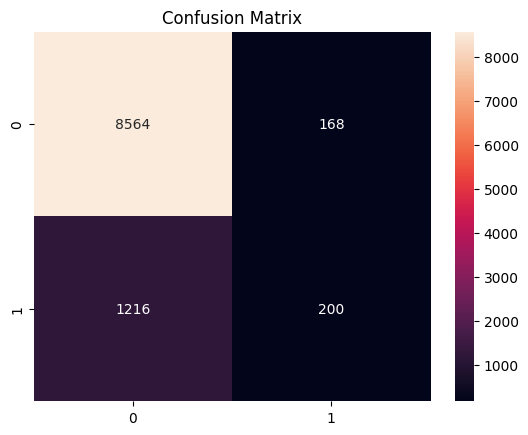

In [4]:
# Baseline dengan Logistic Regression
model = LogisticRegression(max_iter=1000)
fitting = model.fit(X_train, y_train)
predict = fitting.predict(X_test)

# Evaluasi model (accuracy, precision, recall, f1)
print("Hasil akurasi dari model data adalah: ", accuracy_score(y_test, predict))
print("Hasil precision dari model data adalah: ", precision_score(y_test, predict))
print("Hasil recall dari model data adalah: ", recall_score(y_test, predict))
print("Hasil f1 dari model data adalah: ", f1_score(y_test, predict))

# Membuat confusion matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

---

### Jawaban Nomor 2: Analisis Duplicate Value, Missing Value, Outlier, dan Balance Of Data

#### Analisis Duplicate Value

In [5]:
# Analisis Duplicate Value
duplicate = df_train.duplicated()
print("Jumlah data yang bernilai duplikat sebanyak: ", duplicate.sum())

Jumlah data yang bernilai duplikat sebanyak:  1135


In [6]:
# Mencari baris mana saja yang duplikat
duplicate = df_train.duplicated(keep=False)
print("Jumlah baris yang duplikat adalah: %d" % (duplicate.sum()))
print()
print("Menampilkan baris yang duplikat:")
df_train[duplicate]

Jumlah baris yang duplikat adalah: 1890

Menampilkan baris yang duplikat:


,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Sex_F,Sex_M,Diabetes
41464,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,8.0,5.0,7.0,1,0,0
27504,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,9.0,6.0,8.0,1,0,0
27383,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2.0,6.0,8.0,0,1,0
3635,0.0,0.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,6.0,6.0,8.0,1,0,0
27364,0.0,0.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,0.0,5.0,5.0,8.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,0.0,0.0,9.0,6.0,7.0,1,0,0
22313,0.0,0.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,4.0,6.0,8.0,1,0,0
19617,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,5.0,6.0,8.0,0,1,0
15013,0.0,0.0,21.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,5.0,6.0,8.0,1,0,0


#### Analisis Missing Value

In [7]:
# Analisis Missing Value
missing_data = df_train.isnull().sum()
print("Jumlah missing value masing-masing kolom:")
print(missing_data)

Jumlah missing value masing-masing kolom:
HighBP                  0
HighChol                0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Age                     0
Education               0
Income                  0
Sex_F                   0
Sex_M                   0
Diabetes                0
dtype: int64


#### Analisis Outlier

Jumlah data outlier masing-masing kolom:
BMI          1273
GenHlth      1493
MentHlth     4718
PhysHlth     5205
Age             0
Education       0
Income          0
dtype: int64


Boxplot data outlier:


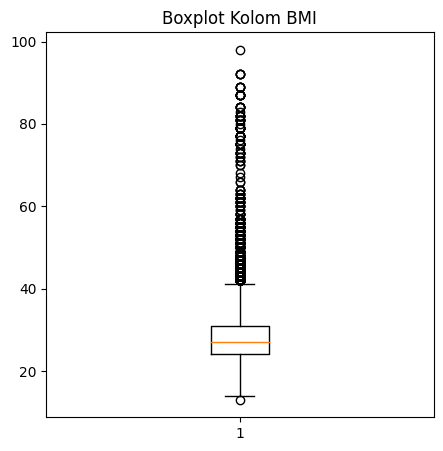

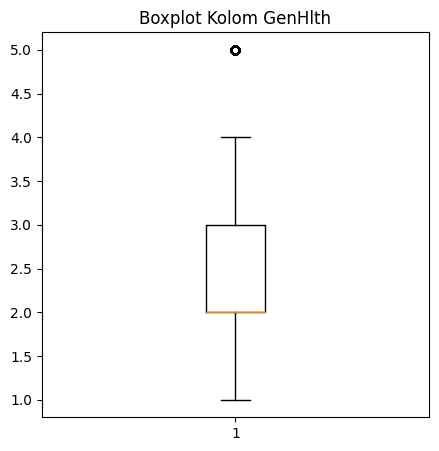

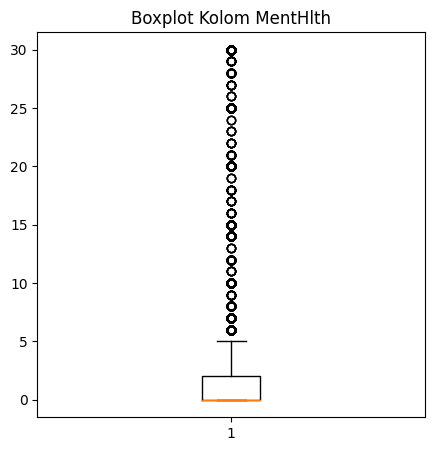

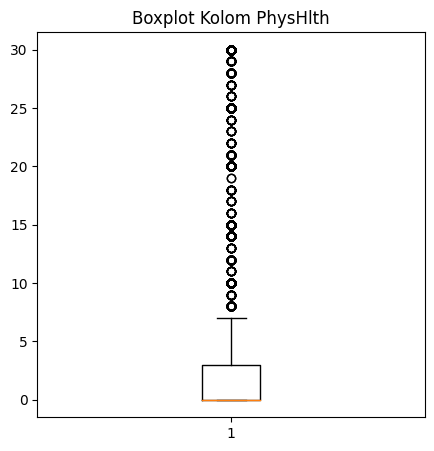

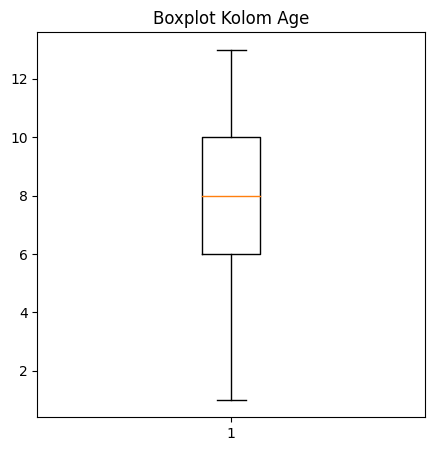

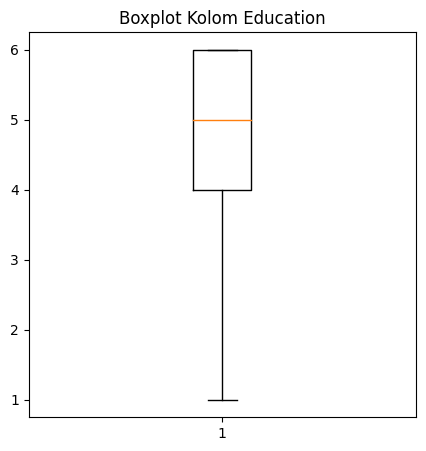

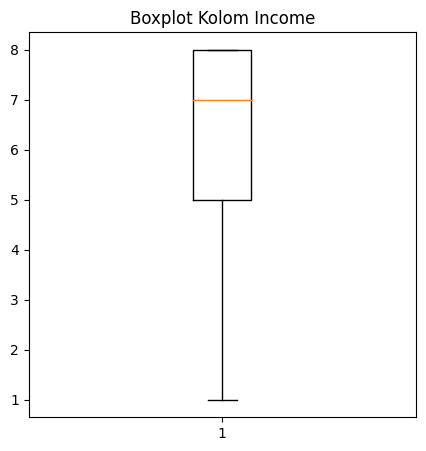

In [8]:
# Analisis Outlier Pada Kolom Numerik yang Bukan Binary
# Alasan mengapa hanya Kolom Numerik yang dipilih dan bukan binary yang diambil adalah karena binary tidak memiliki outlier
numerical_cols = df_train.select_dtypes(include=[np.number]).columns
non_binary_cols = [col for col in numerical_cols if len(df_train[col].unique()) > 2]

# Select Kolom Numerik yang Bukan Binary
df_train_outlier = df_train[non_binary_cols]

# Mencari jumlah outlier untuk setiap kolom
Q1 = df_train_outlier.quantile(0.25)
Q3 = df_train_outlier.quantile(0.75)
IQR = Q3 - Q1
outlier = ((df_train_outlier < (Q1 - 1.5 * IQR)) | (df_train_outlier > (Q3 + 1.5 * IQR))).sum()
print("Jumlah data outlier masing-masing kolom:")
print(outlier)
print()
print()

# Visualisasi data outlier dengan boxplot
print("Boxplot data outlier:")
for col in df_train_outlier.columns:
    plt.figure(figsize=(5,5))
    plt.boxplot(df_train_outlier[col])
    plt.title("Boxplot Kolom " + col)
    plt.show()

#### Analisis Balance Of Data

In [9]:
# Analisis Balance Of Data pada Kolom Target
print("Balance data pada kolom target:")
print(df_train["Diabetes"].value_counts())

Balance data pada kolom target:
Diabetes
0    28031
1     4439
Name: count, dtype: int64


---

### Jawaban Nomor 3: Solusi Dari Permasalahan Nomor 2

Untuk solusi dari permasalahan yang ada pada nomor 2, beberapa langkah yang dapat dilakukan adalah sebagai berikut:
1. Untuk permasalahan terkait dengan Duplicate Value, dari hasil pengecekan terdapat 1135 data yang bernilai duplikat dengan total baris tabel yang duplikat pada data sebesar 1890 data. Permasalahan ini dapat terjadi karena ada kemungkinan bahwa pasien yang memiliki data kondisi kesehatan yang sama dengan pasien lainnya sehingga menyebabkan data yang ada mnejadi duplikat. Solusi yang dapat dilakukan untuk menangani duplikat data ini adalah dengan melakukan penambahan kolom keunikan untuk setiap pasien, misalkan atribut kolom ID sehingga untuk setiap pasien akan memiliki data sendiri yang unik dan tidak menimbulkan duplikat.

2. Untuk permasalahan terkait dengan Missing Value, pada pengecekan sudah tidak ditemukan adanya Missing Value untuk setiap kolom sehingga tidak perlu dilakukan penanganan.

3. Untuk permasalahan terkait dengan Outlier, setelah dilakukan visualisasi dengan Boxplot, ditemukan adanya 4 kolom dengan outlier yang cukup tinggi yaitu untuk kolom BMI (ada 1273 data), GenHlth (ada 1493 data), MentHlth (ada 4718 data), dan PhysHlth (ada 5205 data). Untuk penanganan yang dapat dilakukan agar isi data menjadi lebih baik yaitu dengan dua cara antara lain dengan menghapus data yang memiliki nilai Outlier (namun ini bisa menimbulkan adanya Missing Value) atau cara kedua yang lebih baik yaitu dengan mengganti nilai Outlier dengan nilai rata-rata, median, ataupun modus dari data. Namun, untuk kondisi data ini, jika outlier tidak dilakukan pengolahan juga tidak apa-apa mengingat data yang ada berasal dari kondisi sebenarnya pasien sehingga pada dasarnya tidak perlu dilakukan perubahan.

4. Untuk permasalahan terkait dengan Balance Data, data yang ada masih mengalami ketidakseimbangan yang mana pada kolom target, terdapat 28031 data yang bernilai False dan hanya 4439 data yang bernilai True sehingga solusi yang perlu dilakukan adalah dengan menangani data yang tidak seimbang (imbalance), dengan memanfaatkan oversampling dan undersampling.

---

### Jawaban Nomor 4: Teknik Encoding yang Digunakan

Pada proses pengerjaan praktikum ini, teknik encoding yang diterapkan adalah **Binary Encoding** sehingga kolom **Sex** dibagi menjadi dua kolom terpisah yaitu **Sex_F** dan **Sex_M**, dengan masing-masing kolom mewakili keberadaan jenis kelamin sebagai nilai numerik (0 atau 1). Dengan diterapkannya teknik ini, memungkinkan model untuk mengidentifikasi pengaruh jenis kelamin terhadap risiko diabetes tanpa adanya asumsi ordinal atau numerik yang tidak tepat antar kategori jenis kelamin. Sementara itu, atribut **Diabetes** yang tadinya bernilai FALSE/TRUE juga diubah menjadi 0/1, yang juga merupakan teknik **Binary Encoding**. Pendekatan tersebut memfasilitasi pemrosesan data lebih lanjut karena kebanyakan algoritma pembelajaran mesin memerlukan data dalam format numerik sehingga berbagai metode analisis dapat digunakan. Selain itu, mengubah value TRUE/FALSE menjadi 0/1 juga membuat data menjadi ringan karena yang awalnya bernilai 4-5 byte menjadi 1 byte.

---

### Jawaban Nomor 5: Desain Eksperimen

#### Tujuan Eksperimen
Tujuan eksperimen ini adalah untuk mengidentifikasi berbagai kombinasi fitur yang ada dalam data (informasi terkait keadaan fisik dan kebiasaan hidup dari pasien) dengan tujuan untuk mendapatkan model data paling signifikan dalam memprediksi benar tidaknya pasien mengidap penyakit diabetes.

#### Variabel Dependen dan Independen
Variabel Dependen: Diabetes
Variabel Independen: Semua fitur potensial yang tersedia (HighBp, GighChol, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex_F, Sex_M, Age, Education, dan Income).

#### Strategi Eksperimen
1. Preprocessing Data
2. Membandingkan dengan mencoba berbagai macam jenis model prediksi untuk mendapatkan model dengan akurasi tertinggi dalam memprediksi penyakit diabetes.

#### Skema Validasi
Data yang telah dipisah sebelumnya (df_train, df_val, dan df_test) digunakan untuk validasi menggunakan metode k-fold cross-validation untuk memastikan bahwa model tidak overfit dan akurat.

---
---
---

## Bagian 2

### Jawaban Nomor 6: Implementasi Strategi Eksperimen dan Skema Validasi

```

#### Preprocessing Data

#### Menghilangkan Baris Duplikat dengan Penambahan Kolom ID

In [10]:
# Menambahkan Kolom Baru yaitu ID pada Dataframe
df_train["ID"] = df_train.index
df_val["ID"] = df_val.index
df_test["ID"] = df_test.index

# Kolom ID pindah paling depan
df_train = df_train[["ID"] + [col for col in df_train.columns if col != "ID"]]
df_val = df_val[["ID"] + [col for col in df_val.columns if col != "ID"]]
df_test = df_test[["ID"] + [col for col in df_test.columns if col != "ID"]]

# Sorting data berdasarkan kolom ID
df_train = df_train.sort_values(by="ID")

# Menampilkan data pada df_train
df_train

,ID,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Sex_F,Sex_M,Diabetes
0,0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,9.0,6.0,8.0,1,0,0
3,3,0.0,0.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,2.0,30.0,0.0,0.0,1.0,5.0,7.0,0,1,0
5,5,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,9.0,5.0,4.0,1,0,0
6,6,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,...,2.0,1.0,3.0,0.0,2.0,6.0,5.0,1,0,0
7,7,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,8.0,6.0,8.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50727,50727,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,2.0,0.0,0.0,0.0,9.0,6.0,7.0,1,0,0
50728,50728,0.0,0.0,24.0,1.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,11.0,5.0,4.0,0,1,0
50732,50732,1.0,1.0,23.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,0.0,1.0,0.0,9.0,6.0,8.0,0,1,1
50733,50733,1.0,1.0,30.0,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,20.0,4.0,1.0,7.0,6.0,8.0,1,0,1


In [11]:
# Pengecekan duplikasi
duplicate = df_train.duplicated(keep=False)
print("Jumlah baris yang duplikat adalah: %d" % (duplicate.sum()))
print()
print("Menampilkan baris yang duplikat:")
df_train[duplicate]

Jumlah baris yang duplikat adalah: 0

Menampilkan baris yang duplikat:


,ID,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Sex_F,Sex_M,Diabetes


#### Mengganti Nilai Outlier dengan nilai maksimal dari kuartil atas dan kuartil bawah

Sebenarnya cara ini tidak wajib dilakukan, namun dalam praktikum ini, karena ingin dicari pengolahan data terbaik, maka outlier diperlukan untuk dapat membersihkan data agar menjadi lebih baik modelnya

Batas outlier untuk setiap kolom:
Kolom BMI memiliki batas outlier: 13.5 dan 41.5
Kolom GenHlth memiliki batas outlier: 0.5 dan 4.5
Kolom MentHlth memiliki batas outlier: -3.0 dan 5.0
Kolom PhysHlth memiliki batas outlier: -4.5 dan 7.5


Boxplot data setelah perubahan nilai outlier:


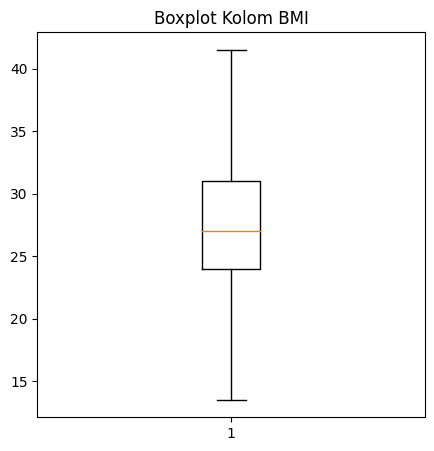

Nilai maksimum pada kolom BMI adalah 41.5
Nilai minimum pada kolom BMI adalah 13.5


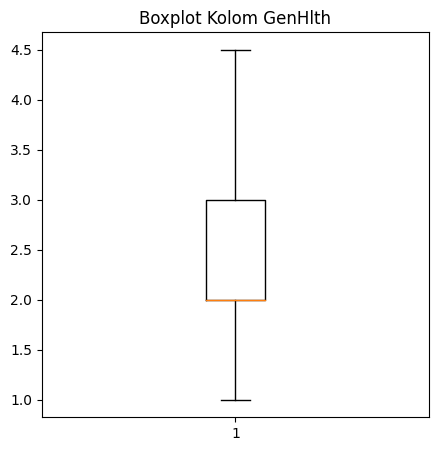

Nilai maksimum pada kolom GenHlth adalah 4.5
Nilai minimum pada kolom GenHlth adalah 1.0


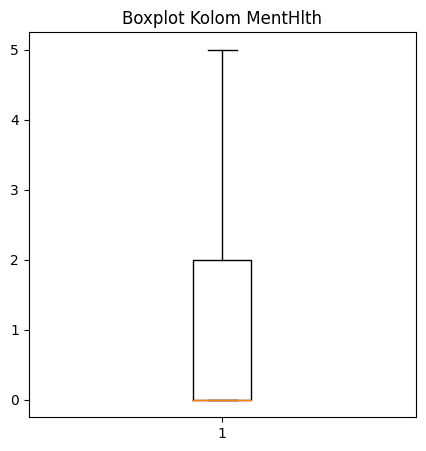

Nilai maksimum pada kolom MentHlth adalah 5.0
Nilai minimum pada kolom MentHlth adalah 0.0


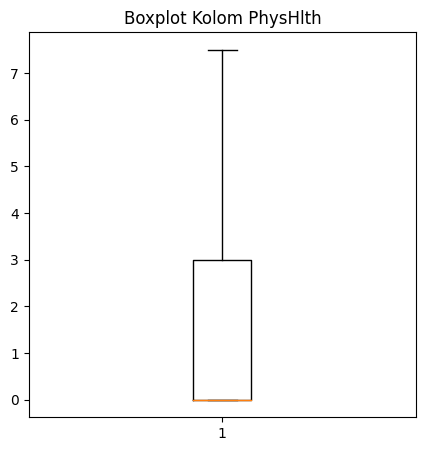

Nilai maksimum pada kolom PhysHlth adalah 7.5
Nilai minimum pada kolom PhysHlth adalah 0.0


Data setelah perubahan nilai outlier:


,ID,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,Sex_F,Sex_M,Diabetes
16093,16093,0.0,0.0,41.5,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,5.0,2.0,0.0,3.0,6.0,7.0,1,0,0
15496,15496,0.0,0.0,41.5,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,1.0,7.0,4.0,4.0,1,0,0
45214,45214,0.0,0.0,41.5,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,4.0,5.0,1,0,0
31850,31850,1.0,1.0,41.5,0.0,0.0,1.0,1.0,0.0,1.0,...,3.0,0.0,7.5,0.0,12.0,5.0,2.0,1,0,0
8388,8388,0.0,0.0,41.5,0.0,0.0,0.0,1.0,0.0,1.0,...,2.0,0.0,0.0,0.0,8.0,6.0,8.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38482,38482,0.0,0.0,15.0,1.0,0.0,0.0,1.0,1.0,1.0,...,3.0,0.0,0.0,0.0,8.0,6.0,8.0,1,0,0
14564,14564,0.0,1.0,15.0,0.0,0.0,0.0,1.0,1.0,1.0,...,3.0,0.0,0.0,0.0,13.0,4.0,4.0,1,0,0
24048,24048,1.0,1.0,15.0,1.0,1.0,0.0,1.0,1.0,1.0,...,2.0,0.0,0.0,1.0,7.0,5.0,2.0,0,1,1
6729,6729,1.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4.5,0.0,7.5,1.0,11.0,3.0,3.0,0,1,0


In [12]:
# Seleksi outlier column berdasarkan tampilan boxplot sebelumnya
outlier_column = ["BMI","GenHlth","MentHlth","PhysHlth"]

# Menghitung batas outlier untuk setiap kolom
print("Batas outlier untuk setiap kolom:")
for i in outlier_column:
    Q1 = df_train[i].quantile(0.25)
    Q3 = df_train[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Kolom {i} memiliki batas outlier: {lower_bound} dan {upper_bound}")

    # Mengganti nilai outlier dengan nilai batas outlier
    df_train[i] = np.where(df_train[i] < lower_bound, lower_bound, df_train[i])
    df_train[i] = np.where(df_train[i] > upper_bound, upper_bound, df_train[i])

print()
print()

# Visualisasi boxplot setelah perubahan nilai outlier
print("Boxplot data setelah perubahan nilai outlier:")
for col in outlier_column:
    plt.figure(figsize=(5,5))
    plt.boxplot(df_train[col])
    plt.title("Boxplot Kolom " + col)
    plt.show()
    print("Nilai maksimum pada kolom", col, "adalah", df_train[col].max())
    print("Nilai minimum pada kolom", col, "adalah", df_train[col].min())

print()
print()

# Sorting data berdasarkan kolom ID dari terbesar hingga terkecil (untuk memastikan bahwa nilai data sudah masuk semua dan tidak ada outlier)
df_train = df_train.sort_values(by="BMI", ascending=False)

# Menampilkan data pada df_train
print("Data setelah perubahan nilai outlier:")
df_train

#### Penanganan Imbalance Dataset dengan Oversampling dan Undersampling

Jumlah data setelah resampling:
(56062, 20)

Hasil akurasi dari model data adalah:  0.7535474970437525
Hasil precision dari model data adalah:  0.31922692435854716
Hasil recall dari model data adalah:  0.6765536723163842
Hasil f1 dari model data adalah:  0.4337785827484718


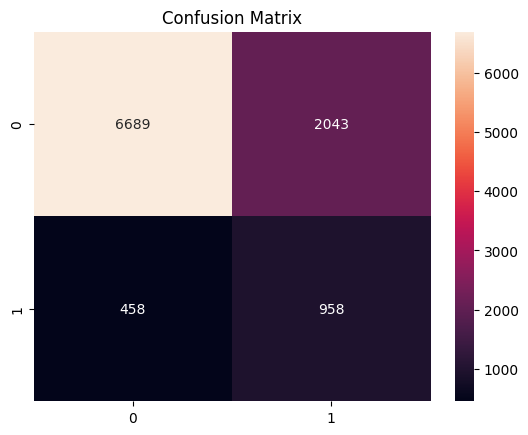

In [13]:
# Penanganan Oversampling data dengan SMOTE
# Inisiasi SMOTE
smote = SMOTE(random_state=123)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("Jumlah data setelah resampling:")
print(X_train_over.shape)
print()

# Menampilkan logistik regression setelah resampling
model = LogisticRegression(max_iter=1000)
fitting = model.fit(X_train_over, y_train_over)
predict = fitting.predict(X_test)

# Evaluasi model (accuracy, precision, recall, f1)
print("Hasil akurasi dari model data adalah: ", accuracy_score(y_test, predict))
print("Hasil precision dari model data adalah: ", precision_score(y_test, predict))
print("Hasil recall dari model data adalah: ", recall_score(y_test, predict))
print("Hasil f1 dari model data adalah: ", f1_score(y_test, predict))

# Membuat confusion matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Jumlah data setelah resampling:
(8878, 20)

Hasil akurasi dari model data adalah:  0.7213243988963343
Hasil precision dari model data adalah:  0.3
Hasil recall dari model data adalah:  0.7478813559322034
Hasil f1 dari model data adalah:  0.42822482814395474


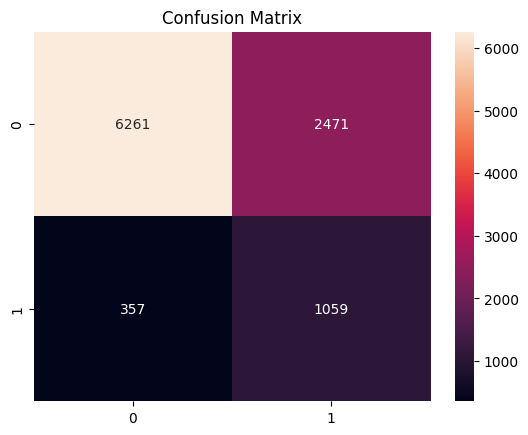

In [14]:
# Penanganan Undersampling data dengan RandomUnderSampler
# Inisiasi RandomUnderSampler
rus = RandomUnderSampler(random_state=123)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print("Jumlah data setelah resampling:")
print(X_train_under.shape)
print()

# Menampilkan logistik regression setelah resampling
model = LogisticRegression(max_iter=1000)
fitting = model.fit(X_train_under, y_train_under)
predict = fitting.predict(X_test)

# Evaluasi model (accuracy, precision, recall, f1)
print("Hasil akurasi dari model data adalah: ", accuracy_score(y_test, predict))
print("Hasil precision dari model data adalah: ", precision_score(y_test, predict))
print("Hasil recall dari model data adalah: ", recall_score(y_test, predict))
print("Hasil f1 dari model data adalah: ", f1_score(y_test, predict))

# Membuat confusion matrix
cm = confusion_matrix(y_test, predict)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

Berdasarkan hasil yang ada antara data yang ada pada kondisi Oversampling dan Undersampling, maka didapat bahwa nilai F1 yang ada untuk model data Oversampling bernilai lebih tinggi sehingga pemrosesan terhadap model dilakukan untuk data yang bersifat Oversampling.

```
```
```

#### Implementasi Model 1: Random Forest Classifier

In [19]:
# Create the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the oversampled data
rf_model.fit(X_train_over, y_train_over)

# Test the model
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precisions = precision_score(y_test, test_predictions)
test_recalls = recall_score(y_test, test_predictions)
test_f1s = f1_score(y_test, test_predictions)
print("Hasil akurasi dari model data test adalah: ", test_accuracy)
print("Hasil precision dari model data test adalah: ", test_precisions)
print("Hasil recall dari model data test adalah: ", test_recalls)
print("Hasil f1 dari model data test adalah: ", test_f1s)
print()

# Menjalanakan 5-fold cross validation untuk model RandomForestClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_precision = cross_val_score(rf_model, X_train_over, y_train_over, cv=kf, scoring='precision')
cv_recall = cross_val_score(rf_model, X_train_over, y_train_over, cv=kf, scoring='recall')
cv_f1 = cross_val_score(rf_model, X_train_over, y_train_over, cv=kf, scoring='f1')
cv_accuracy = cross_val_score(rf_model, X_train_over, y_train_over, cv=kf, scoring='accuracy')

# Print the results
print(f"5-fold CV Accuracy: {np.mean(cv_accuracy)} ± {np.std(cv_accuracy)}")
print(f"5-fold CV Precision: {np.mean(cv_precision)} ± {np.std(cv_precision)}")
print(f"5-fold CV Recall: {np.mean(cv_recall)} ± {np.std(cv_recall)}")
print(f"5-fold CV F1 Score: {np.mean(cv_f1)} ± {np.std(cv_f1)}")

Hasil akurasi dari model data test adalah:  0.8554394954670871
Hasil precision dari model data test adalah:  0.4537205081669691
Hasil recall dari model data test adalah:  0.1765536723163842
Hasil f1 dari model data test adalah:  0.2541942043721403

5-fold CV Accuracy: 0.923299159762417 ± 0.001280241473961601
5-fold CV Precision: 0.9592832002531579 ± 0.0019306587140638044
5-fold CV Recall: 0.8841216576726108 ± 0.001988606564173554
5-fold CV F1 Score: 0.9201670795150164 ± 0.0010287656536529129


#### Implementasi Model 2: XGBoostClassifier

In [18]:
# Create the XGBoostClassifier
xgb_model = XGBClassifier(n_estimators=100, random_state=42)

# Train the model on the oversampled data
xgb_model.fit(X_train_over, y_train_over)

# Test the model
test_predictions = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precisions = precision_score(y_test, test_predictions)
test_recalls = recall_score(y_test, test_predictions)
test_f1s = f1_score(y_test, test_predictions)
print("Hasil akurasi dari model data test adalah: ", test_accuracy)
print("Hasil precision dari model data test adalah: ", test_precisions)
print("Hasil recall dari model data test adalah: ", test_recalls)
print("Hasil f1 dari model data test adalah: ", test_f1s)
print()

# Menjalanakan 5-fold cross validation untuk model XGBoostClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_precision = cross_val_score(xgb_model, X_train_over, y_train_over, cv=kf, scoring='precision')
cv_recall = cross_val_score(xgb_model, X_train_over, y_train_over, cv=kf, scoring='recall')
cv_f1 = cross_val_score(xgb_model, X_train_over, y_train_over, cv=kf, scoring='f1')
cv_accuracy = cross_val_score(xgb_model, X_train_over, y_train_over, cv=kf, scoring='accuracy')

# Print the results
print(f"5-fold CV Accuracy: {np.mean(cv_accuracy)} ± {np.std(cv_accuracy)}")
print(f"5-fold CV Precision: {np.mean(cv_precision)} ± {np.std(cv_precision)}")
print(f"5-fold CV Recall: {np.mean(cv_recall)} ± {np.std(cv_recall)}")
print(f"5-fold CV F1 Score: {np.mean(cv_f1)} ± {np.std(cv_f1)}")

Hasil akurasi dari model data test adalah:  0.861647615293654
Hasil precision dari model data test adalah:  0.5116731517509727
Hasil recall dari model data test adalah:  0.18573446327683615
Hasil f1 dari model data test adalah:  0.27253886010362693

5-fold CV Accuracy: 0.9185366298781876 ± 0.0009771787390857026
5-fold CV Precision: 0.9614343534959653 ± 0.0021387854809303366
5-fold CV Recall: 0.8720452934189871 ± 0.0020898669370082957
5-fold CV F1 Score: 0.9145567328686479 ± 0.0008764659611181304


#### Implementasi Model 3: DecisionTreeClassifier

In [17]:
# Create the DecisionTreeClassifier
dtl_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Train the model on the oversampled data
dtl_model.fit(X_train_over, y_train_over)

# Test the model
test_predictions = dtl_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precisions = precision_score(y_test, test_predictions)
test_recalls = recall_score(y_test, test_predictions)
test_f1s = f1_score(y_test, test_predictions)
print("Hasil akurasi dari model data test adalah: ", test_accuracy)
print("Hasil precision dari model data test adalah: ", test_precisions)
print("Hasil recall dari model data test adalah: ", test_recalls)
print("Hasil f1 dari model data test adalah: ", test_f1s)
print()

# Menjalanakan 5-fold cross validation untuk model DecisionTreeClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_precision = cross_val_score(dtl_model, X_train_over, y_train_over, cv=kf, scoring='precision')
cv_recall = cross_val_score(dtl_model, X_train_over, y_train_over, cv=kf, scoring='recall')
cv_f1 = cross_val_score(dtl_model, X_train_over, y_train_over, cv=kf, scoring='f1')
cv_accuracy = cross_val_score(dtl_model, X_train_over, y_train_over, cv=kf, scoring='accuracy')

# Print the results
print(f"5-fold CV Accuracy: {np.mean(cv_accuracy)} ± {np.std(cv_accuracy)}")
print(f"5-fold CV Precision: {np.mean(cv_precision)} ± {np.std(cv_precision)}")
print(f"5-fold CV Recall: {np.mean(cv_recall)} ± {np.std(cv_recall)}")
print(f"5-fold CV F1 Score: {np.mean(cv_f1)} ± {np.std(cv_f1)}")

Hasil akurasi dari model data test adalah:  0.82163973196689
Hasil precision dari model data test adalah:  0.38994413407821227
Hasil recall dari model data test adalah:  0.4929378531073446
Hasil f1 dari model data test adalah:  0.4354335620711166

5-fold CV Accuracy: 0.870054680810291 ± 0.003393796251262084
5-fold CV Precision: 0.8834035755856027 ± 0.0043203381652441785
5-fold CV Recall: 0.8526897212892293 ± 0.011201659872267927
5-fold CV F1 Score: 0.8677113122997377 ± 0.004442766965161241


### Nomor 7: Kesimpulan Hasil Diabetes
Dari hasil eksperimen yang telah dilakukan, model **XGBoostClassifier** menunjukkan performa yang sangat baik dalam pengaturan cross-validation, dengan skor tinggi di semua metrik precision, recall, dan F1 Score yang menunjukkan konsistensi tinggi dalam prediksi yang dibuatnya. Walaupun dalam pengujian pada data uji skor F1 dan recall tidak meningkat secara signifikan dibandingkan dengan **Random Forest**, kemampuannya untuk mempertahankan kinerja yang tinggi dalam kondisi cross-validation menunjukkan kestabilan dan keandalan model ini dalam berbagai situasi.

Namun, jika tujuan utama adalah mendeteksi kasus positif yang sebenarnya (diabetes), yang direfleksikan melalui skor recall yang tinggi, maka DecisionTreeClassifier dengan pembatasan kedalaman mungkin merupakan pilihan yang lebih baik karena menunjukkan peningkatan dalam skor F1 dan recall yang lebih baik daripada Random Forest. Model ini berhasil menangkap lebih banyak kasus positif nyata tetapi dengan kompromi pada precision, yang berarti model mungkin mengklasifikasikan lebih banyak kasus negatif sebagai positif.

Jadi, pilihan model terbaik tergantung pada prioritas spesifik:

1. XGBoostClassifier untuk performa keseluruhan yang stabil dan konsisten di berbagai kondisi.
2. DecisionTreeClassifier untuk fokus lebih pada mendeteksi kasus positif, terutama dalam konteks di mana biaya dari miss-prediksi kasus positif sangat tinggi.

Penting untuk menimbang kebutuhan spesifik kasus penggunaan.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d0287b28-cba8-43d5-80f1-3b726b199bf4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>